## Portfolio management (eigen portfolio)

A primary objective of portfolio management is to allocate capital into different asset classes to maximize risk-adjusted returns. Mean-variance portfolio optimization is the most commonly used technique for asset allocation. This method requires an estimated covariance matrix and expected returns of the assets considered. However, the erratic nature of financial returns leads to estimation errors in these inputs, especially when the sample size of returns is insufficient compared to the number of assets being allocated.

Dimensionality reduction is a technique we can use to address this issue. Using **PCA**, we can take an n × n covariance matrix of our assets and create a set of n linearly uncorrelated principal portfolios (sometimes referred to in literature as an **eigen portfolio**) made up of our assets and their corresponding variances. The principal compo‐ nents of the covariance matrix capture most of the covariation among the assets and are mutually uncorrelated.

Our goal in this case study is to maximize the risk-adjusted returns of an equity port‐ folio using PCA on a dataset of stock returns.

In [5]:
import pandas as pd
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

# The dataset used for this case study is the Dow Jones Industrial Average (DJIA) index 
# and its respective 30 stocks
dataset = pd.read_csv('./data/Dow_adjcloses.csv',index_col=0)

### Explorative Data Analysis

In [8]:
# shape
print('Dataset shape: ' + str(dataset.shape))
# peek at data
pd.set_option('display.width', 100)
dataset.head(5)

Dataset shape: (4804, 30)


,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.522220,NaN,...,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,NaN,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.899860,NaN,...,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,NaN,45.566248,20.907354
2000-01-05,30.122175,33.959430,3.280149,28.473758,14.914205,22.049145,40.895453,17.228147,25.781550,NaN,...,4.702157,16.415912,31.325831,20.085579,20.254784,5.753327,22.564221,NaN,44.503437,21.097421
2000-01-06,31.877325,33.959430,2.996290,28.553331,15.459153,22.903343,39.781569,17.210031,24.899860,NaN,...,4.677733,16.972739,32.438168,20.122232,20.998392,5.964159,22.449405,NaN,45.126952,20.527220
2000-01-07,32.509812,34.433913,3.138219,29.382213,15.962182,23.305926,42.128682,18.342270,24.506249,NaN,...,4.677733,18.123166,35.023602,20.922479,21.830687,6.662948,22.282692,NaN,48.535033,21.051805


In [10]:
# types
pd.set_option('display.max_rows', 500)
dataset.dtypes

MMM     float64
AXP     float64
AAPL    float64
BA      float64
CAT     float64
CVX     float64
CSCO    float64
KO      float64
DIS     float64
DWDP    float64
XOM     float64
GS      float64
HD      float64
IBM     float64
INTC    float64
JNJ     float64
JPM     float64
MCD     float64
MRK     float64
MSFT    float64
NKE     float64
PFE     float64
PG      float64
TRV     float64
UTX     float64
UNH     float64
VZ      float64
V       float64
WMT     float64
WBA     float64
dtype: object

In [13]:
# describe data
dataset.describe()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
count,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,363.000000,...,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,2741.000000,4804.000000,4804.000000
mean,86.768590,49.659383,49.106634,85.481517,56.697445,61.735451,21.652896,24.983814,46.367724,64.897404,...,23.724266,20.736962,49.959573,55.961115,62.208919,64.417705,27.193436,53.323035,50.766604,41.696637
std,53.941623,22.564051,55.020296,79.084514,34.663396,31.713863,10.074094,10.611235,32.733220,5.768347,...,20.987536,7.629779,19.769481,34.644166,32.626864,62.920008,11.973258,37.647367,17.039732,19.937069
min,25.140195,8.713025,0.827607,17.463252,9.247340,17.565805,6.842430,11.698790,11.018313,49.090000,...,2.594833,8.041066,16.203766,13.286538,14.520547,5.175169,11.209926,9.846111,30.747677,17.317194
25%,51.191601,34.078903,3.899987,37.406768,26.335348,31.820217,14.910132,15.419998,22.044106,62.249826,...,8.036966,15.030615,35.413562,29.906759,34.328042,23.498173,17.433612,18.958517,38.062387,27.704467
50%,63.513883,42.274116,23.316182,58.436552,53.047521,56.941779,18.577993,20.563342,29.521283,66.586254,...,14.146826,18.643331,46.734628,39.823712,55.714581,42.923977,21.556066,45.207207,42.782495,32.705776
75%,122.906370,66.815558,84.007174,112.996317,76.487605,91.687905,24.649935,34.927140,75.833054,69.143042,...,36.544526,25.402775,68.134961,80.767355,92.557058,73.170959,38.995728,76.966054,65.076409,58.164790
max,251.980826,112.420728,231.260273,411.110000,166.832487,128.679825,63.698248,50.400000,117.972904,75.261152,...,85.300186,45.841240,98.030000,146.564192,141.279565,286.330000,60.016174,150.524693,107.009557,90.187639


#### Data visualization
There is a significant positive correlation between the stocks.

<Axes: title={'center': 'Correlation Matrix'}>

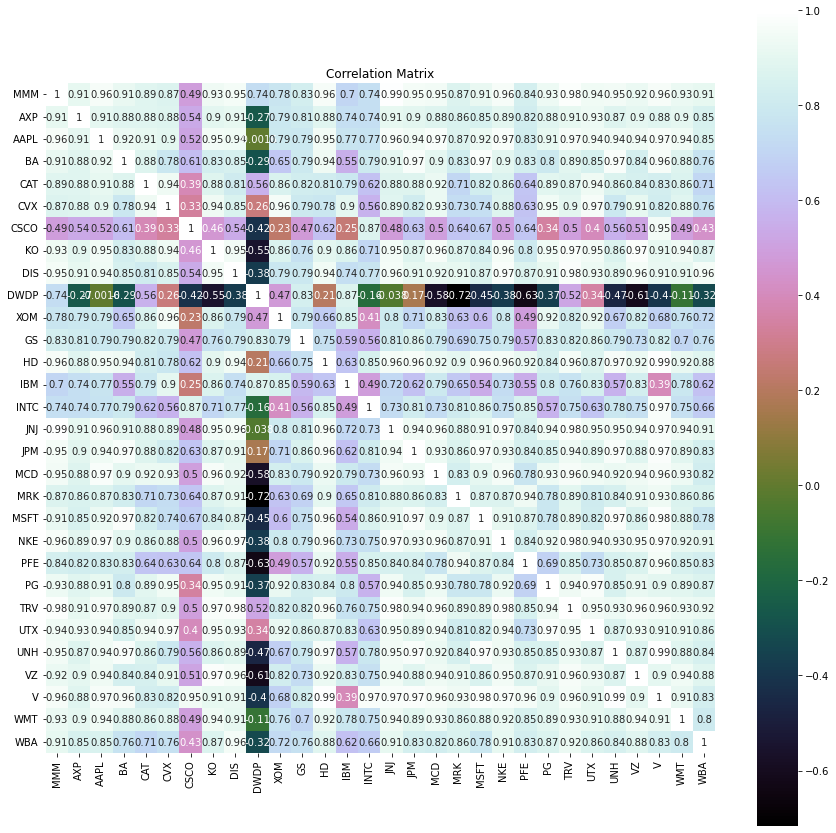

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

### Data preparation
#### Data cleaning
First, we check for NAs in the rows and either drop them or fill them with the mean of the column:

In [16]:
# Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = True


In [17]:
# Getting rid of the columns with more than 30% missing values.
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)

missing_fractions.head(10)

drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

(4804, 28)

In [18]:
# Fill the missing values with the last value available in the dataset. 
dataset=dataset.fillna(method='ffill')

# Given that there are null values drop the rown contianing the null values.
# Drop the rows containing NA
dataset= dataset.dropna(axis=0)

Computing Daily Return

In [19]:
# Daily Linear Returns (%)
datareturns = dataset.pct_change(1)

# Remove Outliers (beyong 3 standard deviation)
datareturns= datareturns[datareturns.apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]
datareturns.dropna(how='any', inplace=True)

#### Data transformation
All the variables should be on the same scale before applying PCA, otherwise a feature with large values will dominate the result. Below we use StandardScaler in sklearn to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1).

Standardization is a useful technique to transform attributes to a standard Normal distribution with a mean of 0 and a standard deviation of 1.

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(datareturns)
rescaledDataset = pd.DataFrame(scaler.fit_transform(datareturns), columns=datareturns.columns,
                               index = datareturns.index)

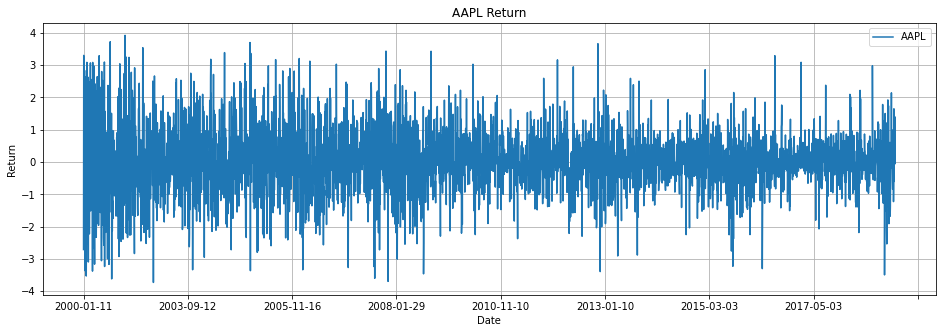

In [23]:
# Visualizing returns for a stock 
plt.figure(figsize=(16, 5))
plt.title("AAPL Return")
plt.ylabel("Return")
rescaledDataset.AAPL.plot()
plt.grid(True);
plt.legend()
plt.show()

### Evaluate Algorithms and Models

In [26]:
# Train-test split
percentage = int(len(rescaledDataset) * 0.8)
X_train = rescaledDataset[:percentage]
X_test = rescaledDataset[percentage:]

X_train_raw = datareturns[:percentage]
X_test_raw = datareturns[percentage:]


stock_tickers = rescaledDataset.columns.values
n_tickers = len(stock_tickers)

As this step, we create a function to compute principle component analysis from sklearn. This function computes an inversed elbow chart that shows the amount of principle components and how many of them explain the variance treshold.

,Explained Variance
0,37.03%
1,42.75%
2,47.10%
3,51.08%
4,54.60%
5,57.74%
6,60.65%
7,63.44%
8,66.18%
9,68.71%


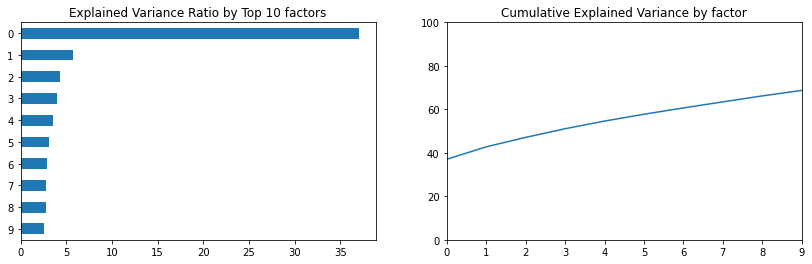

In [27]:
from sklearn.decomposition import PCA
pca = PCA()
PrincipalComponent=pca.fit(X_train)

NumEigenvalues=10
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
Series1 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values()*100
Series2 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum()*100
Series1.plot.barh(ylim=(0,9), label="woohoo",title='Explained Variance Ratio by Top 10 factors',ax=axes[0]);
Series2.plot(ylim=(0,100),xlim=(0,9),ax=axes[1], title='Cumulative Explained Variance by factor');
# explained_variance
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance').head(NumEigenvalues).style.format('{:,.2%}'.format)

We find that the most important factor (eigenvalue 0) explains around 40% of the daily return variation. The dominant factor is usually interpreted as ‘the market’, depending on the results of closer inspection.

The plot on the right shows the cumulative explained variance and indicates that around 10 factors explain 73% of the returns of this large cross-section of stocks.

The decline in the amount of variance of the original data explained by each principal component reflects the extent of correlation among the original features. The first principal component captures the most variance in the original data, the second component is a representation of the second highest variance, and so on. The eigenvectors with the lowest eigenvalues describe the least amount of variation within the dataset. Therefore, these values can be dropped.

Now we can look at the weights of the factors on each principal component to assess any intuitive themes relative to the 28 stocks. We construct five portfolios, defining the *weights of each stock as each of the first five principal components*. We then create a scatterplot that visualizes an organized descending plot with the respective weight of every company at the current chosen principal component

In [35]:
def PCWeights(pca):
    '''
    Principal Components (PC) weights for each PCs
    '''
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

    weights = weights.values.T
    return weights

weights = PCWeights(pca)

In [42]:
# Each PCA's component assign a weight to each feature (the stocks)
weights[0]

array([0.04341287, 0.04351486, 0.02916042, 0.0361483 , 0.03849228,
       0.03393904, 0.03717385, 0.03209969, 0.03967455, 0.03679355,
       0.0397869 , 0.0385528 , 0.03799613, 0.0371992 , 0.03179799,
       0.04345819, 0.02887569, 0.03238323, 0.03690543, 0.03262094,
       0.03619291, 0.03202474, 0.0376561 , 0.04317801, 0.0263372 ,
       0.03180147, 0.0321998 , 0.03062387])

array([[<Axes: title={'center': 'Portfolio 0'}>],
       [<Axes: title={'center': 'Portfolio 1'}>],
       [<Axes: title={'center': 'Portfolio 2'}>],
       [<Axes: title={'center': 'Portfolio 3'}>],
       [<Axes: title={'center': 'Portfolio 4'}>]], dtype=object)

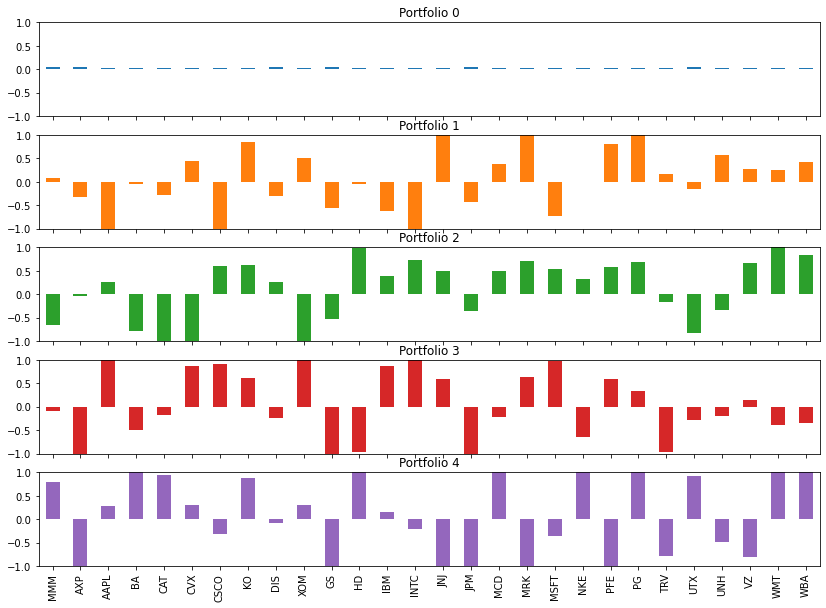

In [45]:
# take the 5 most important components
NumComponents=5    
topPortfolios = pd.DataFrame(pca.components_[:NumComponents], columns=dataset.columns)

eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis=0)
eigen_portfolios.index = [f'Portfolio {i}' for i in range( NumComponents)]
eigen_portfolios.T.plot.bar(subplots=True, layout=(int(NumComponents),1), figsize=(14,10), legend=False, sharey=True, ylim= (-1,1))

<Axes: >

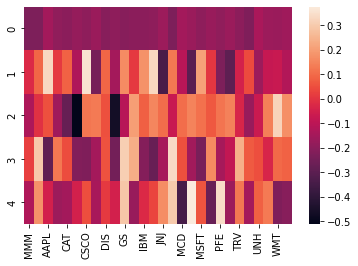

In [47]:
# The heatmap and the plot above shown the contribution of different stocks in each eigenvector.
sns.heatmap(topPortfolios) 

Traditionally, the intuition behind each principal portfolio is that it represents some sort of independent risk factor. The principal portfolio with the largest variance is typically a systematic risk factor (i.e. “market” factor). Looking at the first principal component (Portfolio 0), we see that the weights are distributed homogeneously across the stocks. This nearly equal weighted portfolio explains 40% of the variance in the index and is a fair representa‐ tion of a systematic risk factor. The rest of the eigen portfolios typically correspond to sector or industry factors. For example, Portfolio 1 assigns a high weight to JNJ and MRK, which are stocks from the health care sector. Similarly, Portfolio 3 has high weights on technology and electron‐ ics companies, such AAPL, MSFT, and IBM.

#### Find the best eigen portfolio

In order to find the best eigen portfolios and perform backtesting in the next step, we use the **sharpe ratio**, which is a performance metric that explains the annualized returns against the annualized volatility of each company in a portfolio. A high sharpe ratio explains higher returns and/or lower volatility for the specified portfolio. The sharpe ratio is computed as:

SR = $ \frac{R_p -R_g}{\sigma_p}$

where:
- $R_p$ is the *return* of the portfolio
- $R_f$ is the *risk-free rate*
- $\sigma_p$ is the *standard deviation* of the portfolio's excess return

The annualized sharpe ratio is computed by dividing the annualized returns against the annualized volatility. For annualized return we apply the geometric average of all the returns in respect to the periods per year (days of operations in the exchange in a year). Annualized volatility is computed by taking the standard deviation of the returns and multiplying it by the square root of the periods per year.

In [49]:
# Sharpe Ratio
def sharpe_ratio(ts_returns, periods_per_year=252):
    '''
    Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
    It calculares the annualized return, annualized volatility, and annualized sharpe ratio.
    
    ts_returns are  returns of a signle eigen portfolio.
    '''
    n_years = ts_returns.shape[0]/periods_per_year
    annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

We construct a loop to compute the principle component’s weights for each eigen portfolio, which then uses the sharpe ratio function to look for the portfolio with the highest sharpe ratio. Once we know which portfolio has the highest sharpe ratio, we can visualize its performance against the DJIA Index for comparison.

Eigen portfolio #0 with the highest Sharpe. Return 11.47%, vol = 13.31%, Sharpe = 0.86
      Return       Vol    Sharpe
0   0.114739  0.133133  0.861838
7   0.095771  0.693481  0.138102
5   0.100020  0.844943  0.118375
1   0.056561  0.670429  0.084366
2  -0.106559  0.858820 -0.124076
11 -1.000000  7.227664 -0.138357
13 -0.399292  2.069889 -0.192905
25 -1.000000  5.009294 -0.199629
23 -1.000000  4.955034 -0.201815
6  -0.416203  1.967123 -0.211580
10 -0.157622  0.738399 -0.213465
3  -0.162130  0.738014 -0.219684
26 -0.999993  4.535175 -0.220497
8  -0.422215  1.396786 -0.302276
17 -0.998332  3.277252 -0.304625
24 -0.550144  1.728886 -0.318207
16 -0.980029  3.037992 -0.322591
21 -0.470440  1.420469 -0.331187
14 -0.886228  2.571136 -0.344684
27 -0.932511  2.605850 -0.357853


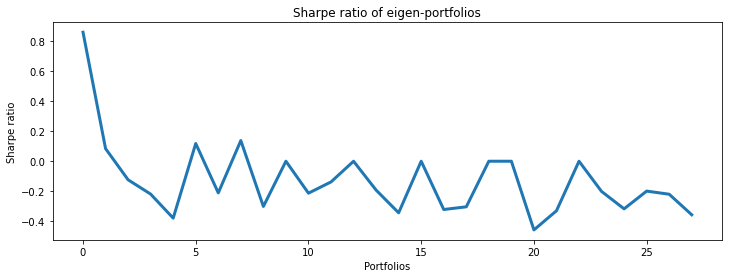

In [50]:
def optimizedPortfolio():
    n_portfolios = len(pca.components_)
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    annualized_vol = np.array([0.] * n_portfolios)
    highest_sharpe = 0 
    stock_tickers = rescaledDataset.columns.values
    n_tickers = len(stock_tickers)
    pcs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = pcs[i] / sum(pcs[i])
        eigen_prtfi = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)
        eigen_prti_returns = np.dot(X_train_raw.loc[:, eigen_prtfi.index], pc_w)
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_train_raw.index)
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe
        
        sharpe_metric= np.nan_to_num(sharpe_metric)
        
    # find portfolio with the highest Sharpe ratio
    highest_sharpe = np.argmax(sharpe_metric)

    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' % 
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100, 
           annualized_vol[highest_sharpe]*100, 
           sharpe_metric[highest_sharpe]))


    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

    results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
    results.dropna(inplace=True)
    results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
    print(results.head(20))

    plt.show()

optimizedPortfolio()

As shown by the results above, Portfolio 0 is the best performing one, with the highest return and the lowest volatility. Let us look at the composition of this portfolio

Sum of weights of current eigen-portfolio: 100.00


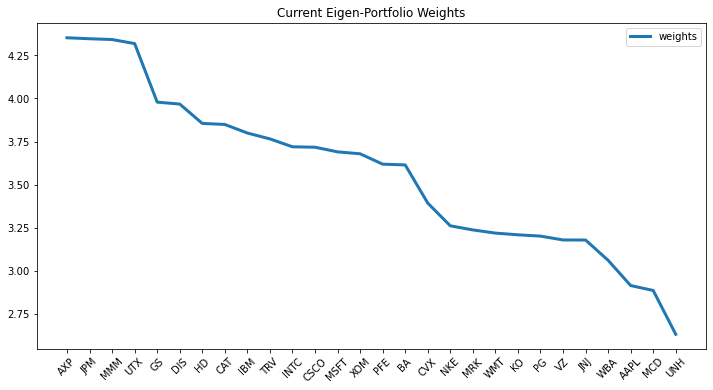

,weights
AXP,4.351486
JPM,4.345819
MMM,4.341287
UTX,4.317801
GS,3.978690
DIS,3.967455
HD,3.855280
CAT,3.849228
IBM,3.799613
TRV,3.765610


In [52]:
weights = PCWeights(pca)
portfolio = portfolio = pd.DataFrame()

def plotEigen(weights, plot=False, portfolio=portfolio):
    portfolio = pd.DataFrame(data ={'weights': weights.squeeze()*100}, index = stock_tickers) 
    portfolio.sort_values(by=['weights'], ascending=False, inplace=True)
    if plot:
        print('Sum of weights of current eigen-portfolio: %.2f' % np.sum(portfolio))
        portfolio.plot(title='Current Eigen-Portfolio Weights', 
            figsize=(12,6), 
            xticks=range(0, len(stock_tickers),1), 
            rot=45, 
            linewidth=3
            )
        plt.show()


    return portfolio

# Weights are stored in arrays, where 0 is the first PC's weights.
plotEigen(weights=weights[0], plot=True)

# The chart shows the allocation of the best portfolio. The weights in the chart are in percentages.

Recall that this is the portfolio that explains 40% of the variance and represents the systematic risk factor. Looking at the portfolio weights (in percentages in the y-axis), they do not vary much and are in the range of 2.7% to 4.5% across all stocks. However, the weights seem to be higher in the financial sector, and stocks such as AXP, JPM, and GS have higher-than-average weights.

### Backtesting the eigen portfolios

We will now try to backtest this algorithm on the test set. We will look at a few of the top performers and the worst performer. For the top performers we look at the 3rd- and 4th-ranked eigen portfolios (Portfolios 5 and 1), while the worst performer reviewed was ranked 19th (Portfolio 14)

Current Eigen-Portfolio:
Return = 32.76%
Volatility = 68.64%
Sharpe = 0.48


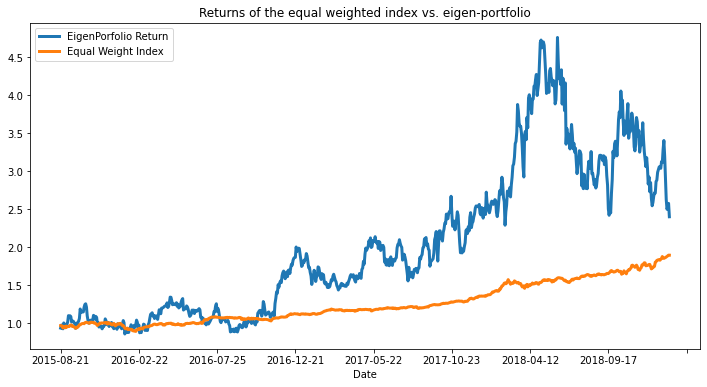

Current Eigen-Portfolio:
Return = 99.80%
Volatility = 58.34%
Sharpe = 1.71


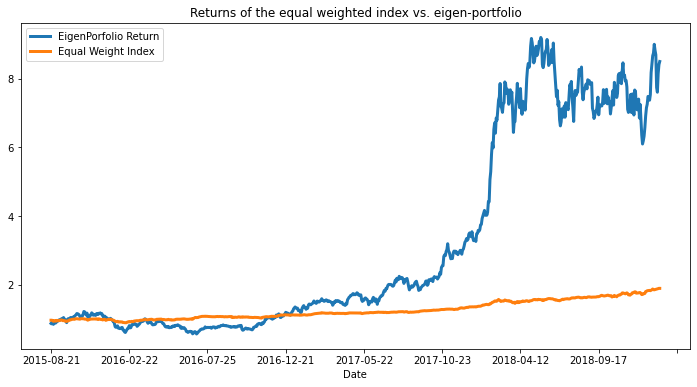

Current Eigen-Portfolio:
Return = -79.42%
Volatility = 185.30%
Sharpe = -0.43


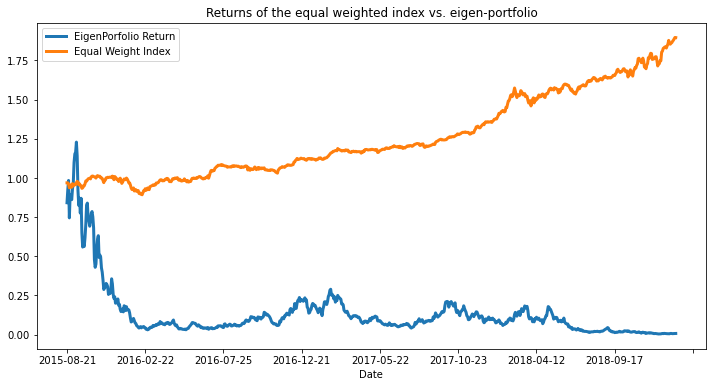

In [53]:
def Backtest(eigen):

    '''

    Plots Principle components returns against real returns.
    
    '''
   
    eigen_prtfi = pd.DataFrame(data ={'weights': eigen.squeeze()}, index = stock_tickers)
    eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)    

    eigen_prti_returns = np.dot(X_test_raw.loc[:, eigen_prtfi.index], eigen)
    eigen_portfolio_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_test_raw.index)
    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)  
    print('Current Eigen-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns*100, vol*100, sharpe))
    equal_weight_return=(X_test_raw * (1/len(pca.components_))).sum(axis=1)    
    df_plot = pd.DataFrame({'EigenPorfolio Return': eigen_portfolio_returns, 'Equal Weight Index': equal_weight_return}, index=X_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the equal weighted index vs. eigen-portfolio' , 
                          figsize=(12,6), linewidth=3)
    plt.show()
    
Backtest(eigen=weights[5])
Backtest(eigen=weights[1])
Backtest(eigen=weights[14])

The eigen portfolio return of the top portfolios outperforms the equally weighted index. The eigen portfolio ranked 19th underperformed the market significantly in the test set. The outperformance and underperformance are attributed to the weights of the stocks or sectors in the eigen portfolio.

Given that these eigen portfolios are independent, they also provide diversification opportunities. As such, we can invest across these uncorrelated eigen portfolios, providing other potential portfolio management benefits.